In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import sklearn.metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [2]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\X_train.csv")
X_test = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\X_test.csv")
Y_train = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Y_train.csv")
Y_test = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Y_test.csv")


In [4]:
#pip list

In [25]:
X_train.shape


(669956, 5)

## Original / Default Model

20937/20937 [==============================] - 37s 2ms/step - loss: 4.4824e-04 - mae: 0.0115 - mse: 4.4824e-04


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


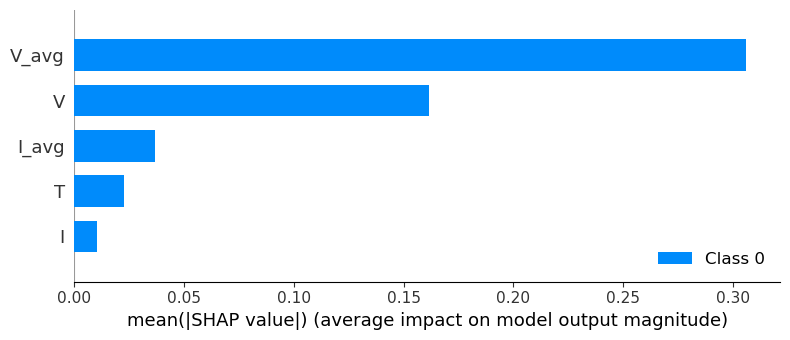

In [31]:




# Convert DataFrame inputs to NumPy arrays
X_train_arr = X_train.values
X_test_arr = X_test.values
Y_train_arr = Y_train.values
Y_test_arr = Y_test.values

# Create a TensorFlow compatible model
model_orig = tf.keras.models.Sequential()
model_orig.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)))
model_orig.add(tf.keras.layers.Dense(32, activation='relu'))
model_orig.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
model_orig.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Track the loss and metrics during training
train_loss = []
test_loss = []
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Train the model for 25 epochs
for epoch in range(25):
    # Train the model
    history = model_orig.fit(X_train_arr, Y_train_arr, epochs=1, batch_size=32, verbose=1)
    
    # Evaluate the model on train and test data
    train_results = model_orig.evaluate(X_train_arr, Y_train_arr, verbose=0)
    test_results = model_orig.evaluate(X_test_arr, Y_test_arr, verbose=0)
    
    # Track the loss and metrics
    train_loss.append(train_results[0])
    test_loss.append(test_results[0])
    train_mae.append(train_results[1])
    test_mae.append(test_results[1])
    train_rmse.append(np.sqrt(train_results[2]))
    test_rmse.append(np.sqrt(test_results[2]))

# Create an explainer object using the trained model
explainer = shap.DeepExplainer(model_orig, X_train_arr[:100])  # Use a random subset of the background samples

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_arr)

shap.summary_plot(shap_values, X_test_arr, feature_names=['V', 'I', 'T', 'V_avg', 'I_avg'])
# Plot the convergence of loss function, MAE, and RMSE
epochs = range(1, 26)



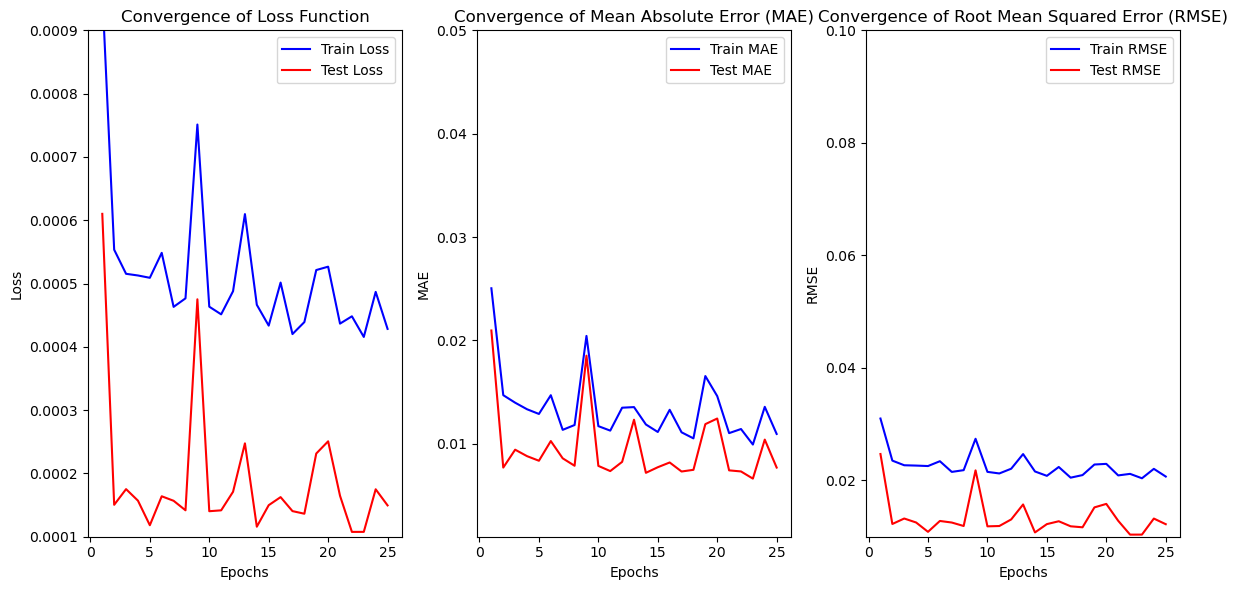

In [32]:

# Loss Function
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, test_loss, 'r-', label='Test Loss')
plt.ylim(0.0001, 0.0009)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence of Loss Function')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(epochs, train_mae, 'b-', label='Train MAE')
plt.plot(epochs, test_mae, 'r-', label='Test MAE')
plt.ylim(0.001, 0.05)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Convergence of Mean Absolute Error (MAE)')
plt.legend()

# RMSE
plt.subplot(1, 3, 3)
plt.plot(epochs, train_rmse, 'b-', label='Train RMSE')
plt.plot(epochs, test_rmse, 'r-', label='Test RMSE')
plt.ylim(0.01, 0.1)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Convergence of Root Mean Squared Error (RMSE)')
plt.legend()

plt.tight_layout()
plt.show()

157/157 [==============================] - 0s 1ms/step


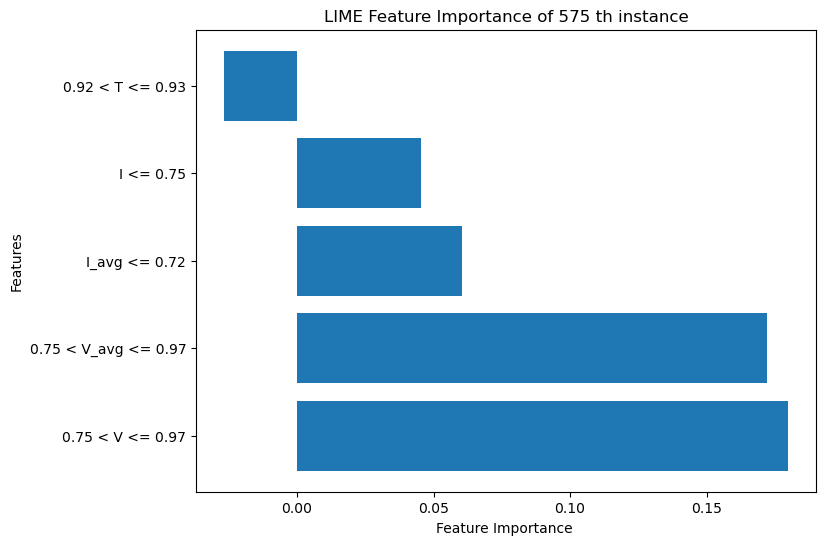

In [36]:
#lime
from lime import lime_tabular

# Apply LIME explainable model
explainer_lime = lime_tabular.LimeTabularExplainer(X_train_arr, mode='regression', feature_names=['V', 'I', 'T', 'V_avg', 'I_avg'])

# Select a random instance from the test set
random_instance_idx = np.random.randint(len(X_test_arr))

# Explain the instance using LIME
explanation = explainer_lime.explain_instance(X_test_arr[random_instance_idx], model_orig.predict, num_features=5)

# Get the feature importance and visualize the results
lime_feature_importance = explanation.as_list()
lime_feature_names = [f[0] for f in lime_feature_importance]
lime_feature_values = [f[1] for f in lime_feature_importance]

# Plot the LIME feature importance
plt.figure(figsize=(8, 6))
plt.barh(lime_feature_names, lime_feature_values)
plt.xlabel('Feature Importance ')
plt.ylabel('Features')
plt.title('LIME Feature Importance of {} th instance'.format(random_instance_idx))
plt.show()










## Model with different Optimizer

In [43]:
# Convert DataFrame inputs to NumPy arrays
X_train_arr = X_train.values
X_test_arr = X_test.values
Y_train_arr = Y_train.values
Y_test_arr = Y_test.values

# Create a TensorFlow compatible model
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)))
model_2.add(tf.keras.layers.Dense(32, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
model_2.compile(optimizer='Nadam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Track the loss and metrics during training
train_loss = []
test_loss = []
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Train the model for 25 epochs
for epoch in range(5):
    # Train the model
    history = model_2.fit(X_train_arr, Y_train_arr, epochs=1, batch_size=32, verbose=1)
    
    # Evaluate the model on train and test data
    train_results = model_2.evaluate(X_train_arr, Y_train_arr, verbose=0)
    test_results = model_2.evaluate(X_test_arr, Y_test_arr, verbose=0)
    
    # Track the loss and metrics
    train_loss.append(train_results[0])
    test_loss.append(test_results[0])
    train_mae.append(train_results[1])
    test_mae.append(test_results[1])
    train_rmse.append(np.sqrt(train_results[2]))
    test_rmse.append(np.sqrt(test_results[2]))


# Plot the convergence of loss function, MAE, and RMSE
epochs = range(1, 6)


20937/20937 [==============================] - 39s 2ms/step - loss: 5.0839e-04 - mae: 0.0130 - mse: 5.0839e-04


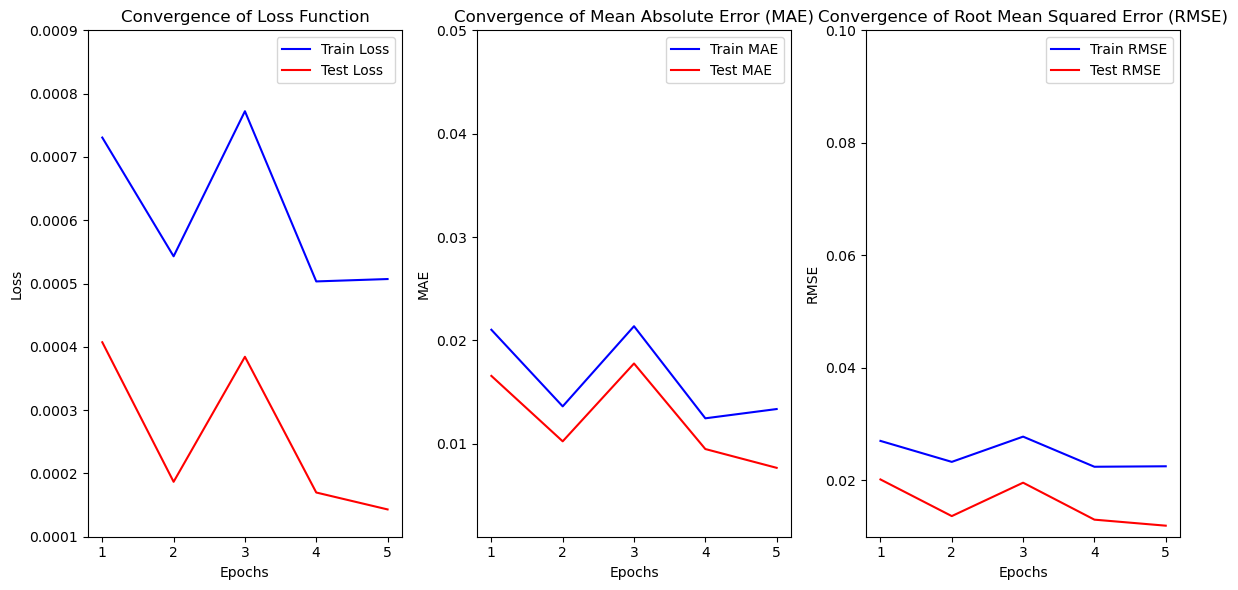

In [44]:

# Loss Function
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, test_loss, 'r-', label='Test Loss')
plt.ylim(0.0001, 0.0009)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence of Loss Function')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(epochs, train_mae, 'b-', label='Train MAE')
plt.plot(epochs, test_mae, 'r-', label='Test MAE')
plt.ylim(0.001, 0.05)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Convergence of Mean Absolute Error (MAE)')
plt.legend()

# RMSE
plt.subplot(1, 3, 3)
plt.plot(epochs, train_rmse, 'b-', label='Train RMSE')
plt.plot(epochs, test_rmse, 'r-', label='Test RMSE')
plt.ylim(0.01, 0.1)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Convergence of Root Mean Squared Error (RMSE)')
plt.legend()

plt.tight_layout()
plt.show()

## Model with different initializations

In [38]:
# Define a function to create and compile the model
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    
    return model

# Convert DataFrame inputs to NumPy arrays
X_train_arr = X_train.values
X_test_arr = X_test.values
Y_train_arr = Y_train.values
Y_test_arr = Y_test.values

# Track the loss and metrics during training
train_loss = []
test_loss = []
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Train the model with different initializations
num_runs = 5  # Number of runs with different initializations

for run in range(num_runs):
    # Create a new model with random initialization
    model = create_model()
    
    # Train the model
    history = model.fit(X_train_arr, Y_train_arr, epochs=1, batch_size=32, verbose=1)
    
    # Evaluate the model on train and test data
    train_results = model.evaluate(X_train_arr, Y_train_arr, verbose=0)
    test_results = model.evaluate(X_test_arr, Y_test_arr, verbose=0)
    
    # Track the loss and metrics
    train_loss.append(train_results[0])
    test_loss.append(test_results[0])
    train_mae.append(train_results[1])
    test_mae.append(test_results[1])
    train_rmse.append(np.sqrt(train_results[2]))
    test_rmse.append(np.sqrt(test_results[2]))


20937/20937 [==============================] - 37s 2ms/step - loss: 9.7923e-04 - mae: 0.0190 - mse: 9.7923e-04


## Cross Validation 

In [45]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

X = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Combined\X_combined.csv")
Y = pd.read_csv(r"D:\Prasanna MS\Battery SOC\Dataset, Coding\Matlab - example\Excel dataset\Dataset\Combined\Y_combined.csv")

# Convert DataFrame inputs to NumPy arrays
X_arr = X.values
Y_arr = Y.values

# Define the number of folds for cross-validation
num_folds = 5

# Initialize lists to track performance metrics
train_loss = []
test_loss = []
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Perform cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

for train_index, test_index in kf.split(X_arr):
    X_train_arr, X_test_arr = X_arr[train_index], X_arr[test_index]
    Y_train_arr, Y_test_arr = Y_arr[train_index], Y_arr[test_index]

    # Create a TensorFlow compatible model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

    # Train the model for 5 epochs
    for epoch in range(5):
        # Train the model
        history = model.fit(X_train_arr, Y_train_arr, epochs=1, batch_size=32, verbose=1)

    # Evaluate the model on train and test data
    train_results = model.evaluate(X_train_arr, Y_train_arr, verbose=0)
    test_results = model.evaluate(X_test_arr, Y_test_arr, verbose=0)

    # Track the loss and metrics
    train_loss.append(train_results[0])
    test_loss.append(test_results[0])
    train_mae.append(train_results[1])
    test_mae.append(test_results[1])
    train_rmse.append(np.sqrt(train_results[2]))
    test_rmse.append(np.sqrt(test_results[2]))

# Plot the convergence of loss function, MAE, and RMSE
epochs = range(1, 6)


17937/17937 [==============================] - 41s 2ms/step - loss: 4.9741e-04 - mae: 0.0131 - mse: 4.9741e-04


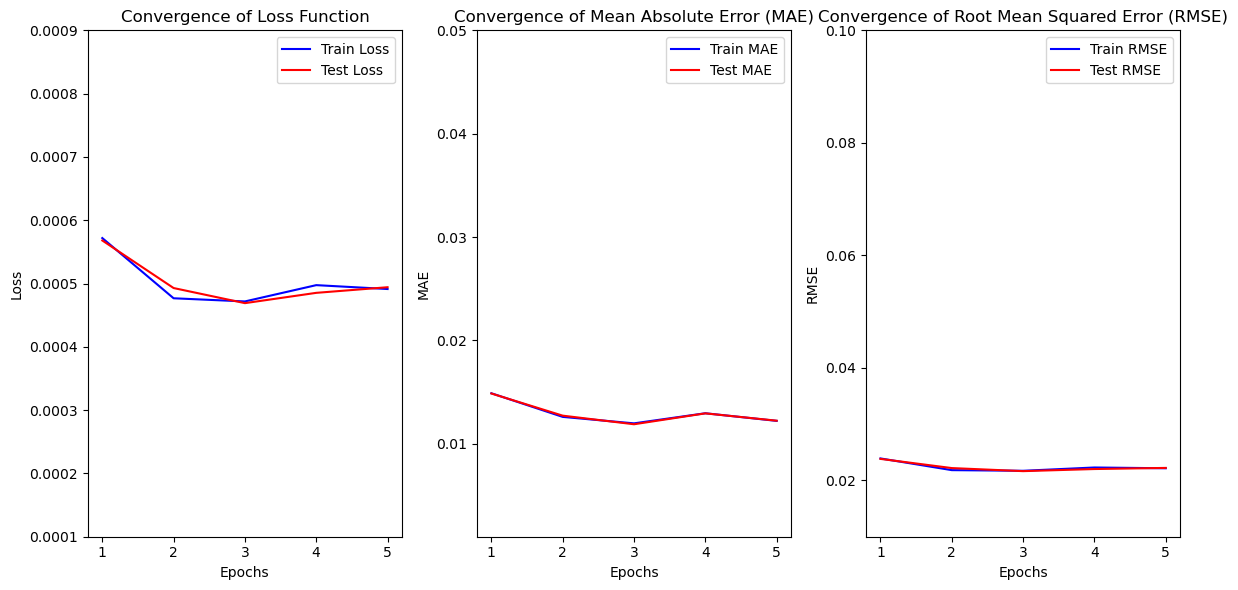

In [46]:

# Loss Function
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, test_loss, 'r-', label='Test Loss')
plt.ylim(0.0001, 0.0009)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence of Loss Function')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(epochs, train_mae, 'b-', label='Train MAE')
plt.plot(epochs, test_mae, 'r-', label='Test MAE')
plt.ylim(0.001, 0.05)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Convergence of Mean Absolute Error (MAE)')
plt.legend()

# RMSE
plt.subplot(1, 3, 3)
plt.plot(epochs, train_rmse, 'b-', label='Train RMSE')
plt.plot(epochs, test_rmse, 'r-', label='Test RMSE')
plt.ylim(0.01, 0.1)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Convergence of Root Mean Squared Error (RMSE)')
plt.legend()

plt.tight_layout()
plt.show()

## Optimized Model with Key predictors - V_avg, V, I_avg

In [19]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()
X_train_copy = X_train_copy.drop(columns=['T','I'])

X_train_copy.head()

,V,V_avg,I_avg
0,0.385148,0.385148,0.75102
1,0.385152,0.385150,0.75102
2,0.385156,0.385152,0.75102
3,0.385160,0.385154,0.75102
4,0.385164,0.385156,0.75102


In [29]:
X_test_arr.shape

(47517, 5)

In [20]:
X_test_copy = X_test_copy.drop(columns=['T','I'])
X_test_copy.head()

,V,V_avg,I_avg
0,0.966960,0.966960,0.748900
1,0.966020,0.966490,0.747946
2,0.965901,0.966294,0.747628
3,0.965783,0.966166,0.747496
4,0.965665,0.966066,0.747395


In [21]:
Y_train_copy=Y_train.copy()
Y_test_copy=Y_test.copy()

20937/20937 [==============================] - 36s 2ms/step - loss: 0.0015 - mae: 0.0245 - mse: 0.0015


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


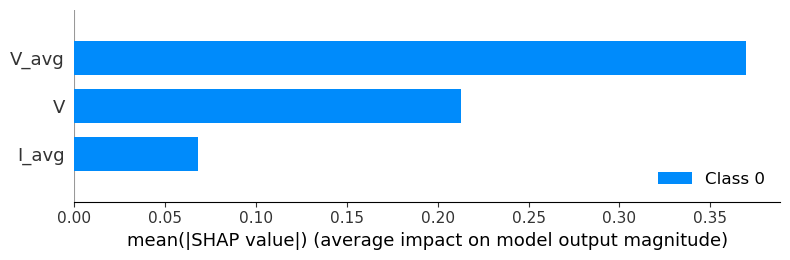

In [22]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Convert DataFrame inputs to NumPy arrays
X_train_arr1 = X_train_copy.values
X_test_arr1 = X_test_copy.values
Y_train_arr1 = Y_train_copy.values
Y_test_arr1 = Y_test_copy.values

# Create a TensorFlow compatible model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Track the loss and metrics during training
train_loss = []
test_loss = []
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Train the model for 5 epochs
for epoch in range(20):
    # Train the model
    history = model.fit(X_train_arr1, Y_train_arr1, epochs=1, batch_size=32, verbose=1)
    
    # Evaluate the model on train and test data
    train_results = model.evaluate(X_train_arr1, Y_train_arr1, verbose=0)
    test_results = model.evaluate(X_test_arr1, Y_test_arr1, verbose=0)
    
    # Track the loss and metrics
    train_loss.append(train_results[0])
    test_loss.append(test_results[0])
    train_mae.append(train_results[1])
    test_mae.append(test_results[1])
    train_rmse.append(np.sqrt(train_results[2]))
    test_rmse.append(np.sqrt(test_results[2]))

# Create an explainer object using the trained model
explainer = shap.DeepExplainer(model, X_train_arr1[:100])  # Use a random subset of the background samples

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_arr1)

shap.summary_plot(shap_values, X_test_arr1, feature_names=['V', 'V_avg', 'I_avg'])
# Plot the convergence of loss function, MAE, and RMSE
epochs = range(1, 21)



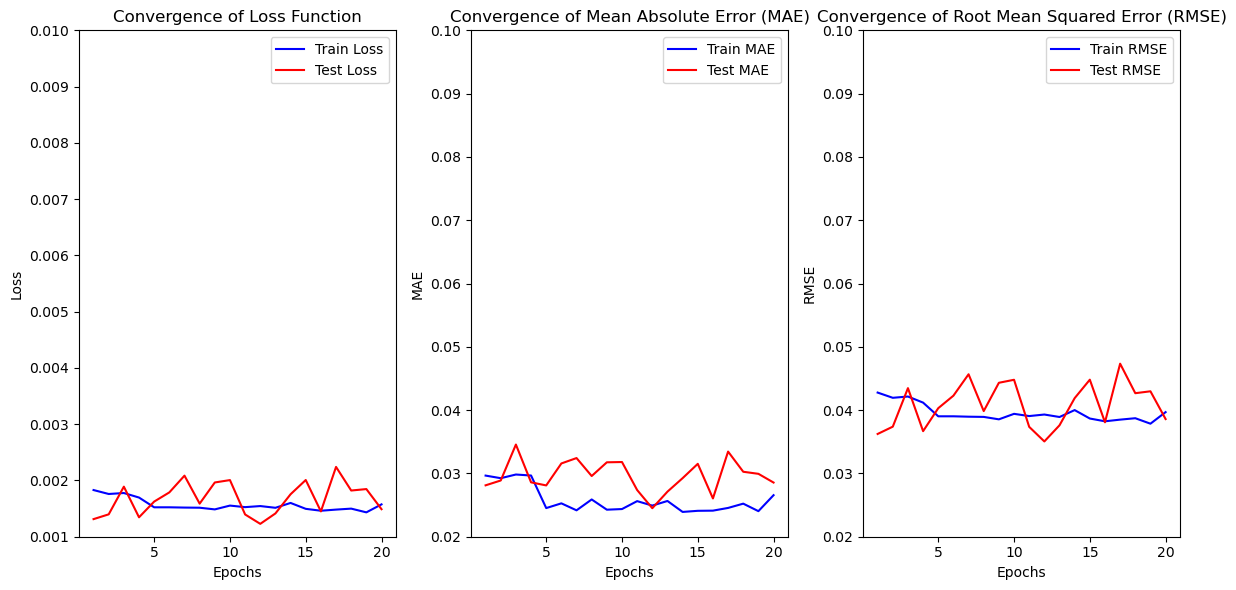

In [11]:
# Loss Function
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, test_loss, 'r-', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence of Loss Function')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(epochs, train_mae, 'b-', label='Train MAE')
plt.plot(epochs, test_mae, 'r-', label='Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Convergence of Mean Absolute Error (MAE)')
plt.legend()

# RMSE
plt.subplot(1, 3, 3)
plt.plot(epochs, train_rmse, 'b-', label='Train RMSE')
plt.plot(epochs, test_rmse, 'r-', label='Test RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Convergence of Root Mean Squared Error (RMSE)')
plt.legend()

plt.tight_layout()
plt.show()
